# 🚴 Bike Sharing Data Analysis

## Informasi Proyek
- **Dataset**: Bike Sharing Dataset (Hourly)
- **Tujuan**: Menganalisis pola penggunaan bike sharing untuk mendapatkan insights strategis
- **Teknik Analisis**: Time Series Analysis, Clustering, Correlation Analysis, Pattern Mining

## Deskripsi Dataset
Dataset ini berisi informasi rental sepeda per jam dengan variabel:
- **Temporal**: instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday
- **Weather**: weathersit, temp, atemp, hum, windspeed
- **Target**: casual, registered, cnt (total count)

---

## 1. Import Libraries dan Load Data

Pada tahap ini, kita akan mengimport library yang diperlukan untuk analisis data.

In [1]:
# Data manipulasi
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning & Advanced Analytics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import pearsonr

# Deret Waktu
from statsmodels.tsa.seasonal import seasonal_decompose

# Peringatan
import warnings
warnings.filterwarnings('ignore')

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

## 2. Load dan Eksplorasi Data Awal

Memuat dataset dan melakukan pemeriksaan awal terhadap struktur data.

In [2]:
# Load Dataset BikeSharing
df = pd.read_csv('hour.csv')

# Informasi dasar dataset
print("=" * 80)
print("INFORMASI DATASET")
print("=" * 80)
print(f"Jumlah baris: {len(df):,}")
print(f"Jumlah kolom: {len(df.columns)}")
print(f"Periode data: {df['dteday'].min()} s/d {df['dteday'].max()}")
print(f"\nTotal rental: {df['cnt'].sum():,} sepeda")
print(f"Rata-rata rental per jam: {df['cnt'].mean():.2f} sepeda")
print("\n" + "=" * 80)

INFORMASI DATASET
Jumlah baris: 17,379
Jumlah kolom: 17
Periode data: 2011-01-01 s/d 2012-12-31

Total rental: 3,292,679 sepeda
Rata-rata rental per jam: 189.46 sepeda



In [3]:
# Tampilkan 5 baris pertama
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Statistik deskriptif
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Cek missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nPersentase missing values: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%")

Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Persentase missing values: 0.00%


## 3. Data Preprocessing dan Feature Engineering

Pada tahap ini, kita akan:
1. Mengubah tipe data yang sesuai
2. Membuat fitur-fitur baru untuk analisis lebih mendalam
3. Encoding kategorikal variables

In [7]:
#Mengubah kolom tanggal menjadi format datetime
df['dteday'] = pd.to_datetime(df['dteday'])

#Membuat kolom datetime
df['datetime'] = df['dteday'] + pd.to_timedelta(df['hr'], unit='h')

#Ekstraksi Fitur Waktu
df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month
df['day'] = df['dteday'].dt.day
df['day_of_week'] = df['dteday'].dt.dayofweek
df['week_of_year'] = df['dteday'].dt.isocalendar().week

#Membuat kategori label
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
weekday_labels = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                  4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

df['season_label'] = df['season'].map(season_labels)
df['weather_label'] = df['weathersit'].map(weather_labels)
df['weekday_label'] = df['weekday'].map(weekday_labels)

#Membuat kategori waktu
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hr'].apply(categorize_hour)

#Membuat indikator rush hour
df['is_rush_hour'] = df['hr'].apply(lambda x: 1 if x in [7, 8, 17, 18] else 0)

#Membuat kategori suhu
df['temp_category'] = pd.cut(df['temp'], bins=[0, 0.3, 0.6, 1.0],
                              labels=['Cold', 'Moderate', 'Hot'])

#Denormalisasi suhu (dengan asumsi dinormalisasi ke 0-1, kisaran sebenarnya -8 hingga 39°C)
df['temp_celsius'] = df['temp'] * 41 - 8
df['atemp_celsius'] = df['atemp'] * 50 - 16

print("Feature Engineering Selesai!")
print(f"Total fitur sekarang: {len(df.columns)}")

Feature Engineering Selesai!
Total fitur sekarang: 31


In [8]:
# Tampilkan dataset dengan fitur baru
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime,year,month,day,day_of_week,week_of_year,season_label,weather_label,weekday_label,time_of_day,is_rush_hour,temp_category,temp_celsius,atemp_celsius
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00,2011,1,1,5,52,Spring,Clear,Saturday,Night,0,Cold,1.84,-1.605
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00,2011,1,1,5,52,Spring,Clear,Saturday,Night,0,Cold,1.02,-2.365
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00,2011,1,1,5,52,Spring,Clear,Saturday,Night,0,Cold,1.02,-2.365
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00,2011,1,1,5,52,Spring,Clear,Saturday,Night,0,Cold,1.84,-1.605
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00,2011,1,1,5,52,Spring,Clear,Saturday,Night,0,Cold,1.84,-1.605
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,2011-01-01 05:00:00,2011,1,1,5,52,Spring,Mist,Saturday,Night,0,Cold,1.84,-3.120
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,2011-01-01 06:00:00,2011,1,1,5,52,Spring,Clear,Saturday,Morning,0,Cold,1.02,-2.365
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,2011-01-01 07:00:00,2011,1,1,5,52,Spring,Clear,Saturday,Morning,1,Cold,0.20,-3.120
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,2011-01-01 08:00:00,2011,1,1,5,52,Spring,Clear,Saturday,Morning,1,Cold,1.84,-1.605
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,2011-01-01 09:00:00,2011,1,1,5,52,Spring,Clear,Saturday,Morning,0,Moderate,5.12,1.425


## 4. Exploratory Data Analysis (EDA)

### 4.1 Distribusi Target Variable

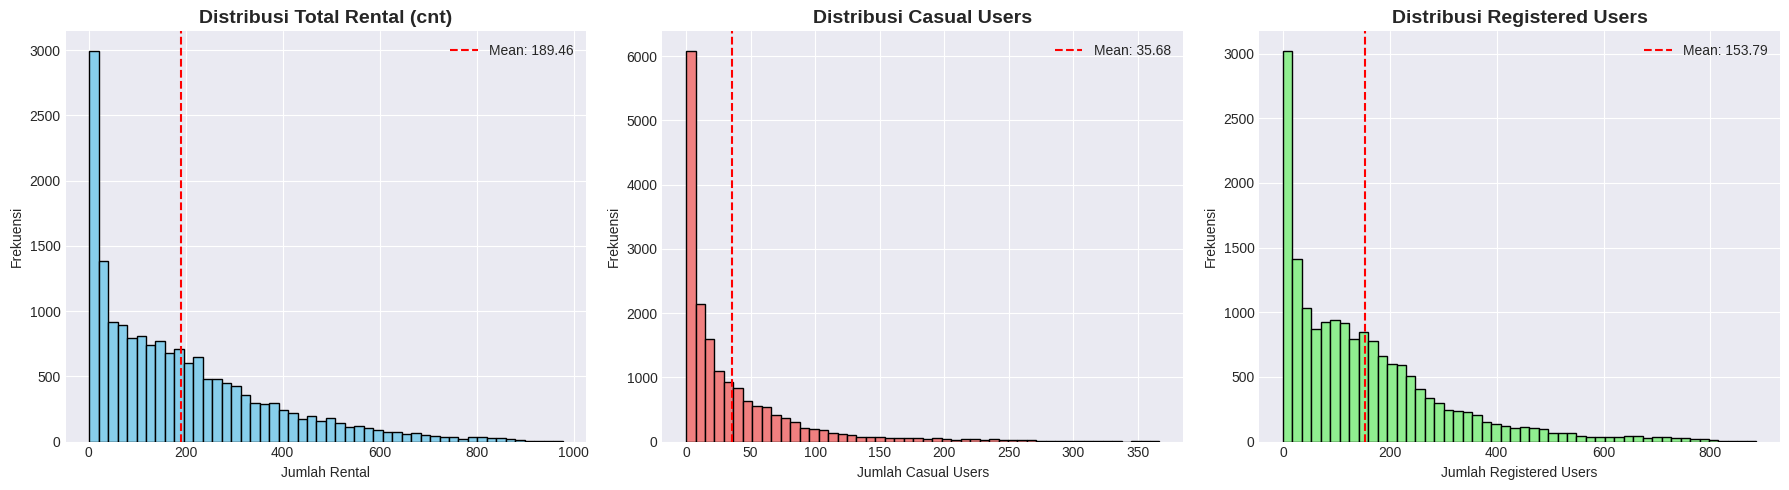

Casual vs Registered Ratio: 23.20%


In [9]:
# Distribusi total rental
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Total count
axes[0].hist(df['cnt'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribusi Total Rental (cnt)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Jumlah Rental')
axes[0].set_ylabel('Frekuensi')
axes[0].axvline(df['cnt'].mean(), color='red', linestyle='--', label=f'Mean: {df["cnt"].mean():.2f}')
axes[0].legend()

# Pengguna Casual
axes[1].hist(df['casual'], bins=50, color='lightcoral', edgecolor='black')
axes[1].set_title('Distribusi Casual Users', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Jumlah Casual Users')
axes[1].set_ylabel('Frekuensi')
axes[1].axvline(df['casual'].mean(), color='red', linestyle='--', label=f'Mean: {df["casual"].mean():.2f}')
axes[1].legend()

# Pengguna Registered
axes[2].hist(df['registered'], bins=50, color='lightgreen', edgecolor='black')
axes[2].set_title('Distribusi Registered Users', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Jumlah Registered Users')
axes[2].set_ylabel('Frekuensi')
axes[2].axvline(df['registered'].mean(), color='red', linestyle='--', label=f'Mean: {df["registered"].mean():.2f}')
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"Casual vs Registered Ratio: {df['casual'].sum() / df['registered'].sum():.2%}")

### 4.2 Analisis Temporal Pattern

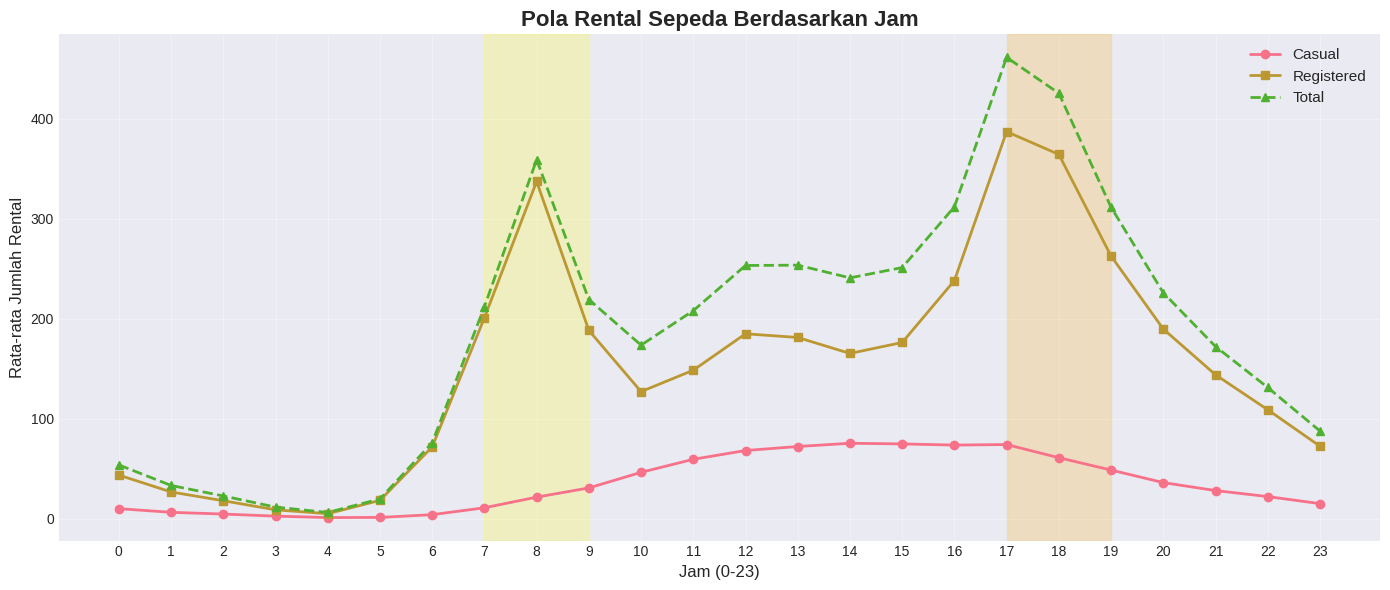

In [10]:
# Rental berdasarkan jam
hourly_avg = df.groupby('hr')[['casual', 'registered', 'cnt']].mean().reset_index()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(hourly_avg['hr'], hourly_avg['casual'], marker='o', label='Casual', linewidth=2)
ax.plot(hourly_avg['hr'], hourly_avg['registered'], marker='s', label='Registered', linewidth=2)
ax.plot(hourly_avg['hr'], hourly_avg['cnt'], marker='^', label='Total', linewidth=2, linestyle='--')

ax.set_title('Pola Rental Sepeda Berdasarkan Jam', fontsize=16, fontweight='bold')
ax.set_xlabel('Jam (0-23)', fontsize=12)
ax.set_ylabel('Rata-rata Jumlah Rental', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xticks(range(0, 24))

# Highlight rush hours
ax.axvspan(7, 9, alpha=0.2, color='yellow', label='Morning Rush')
ax.axvspan(17, 19, alpha=0.2, color='orange', label='Evening Rush')

plt.tight_layout()
plt.show()

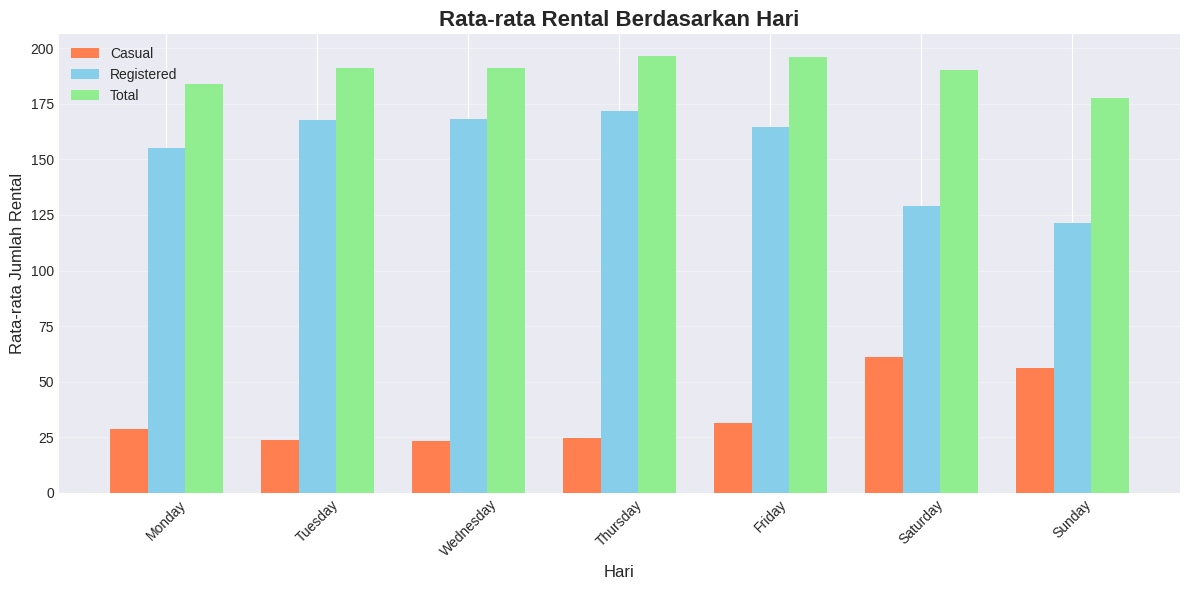

In [11]:
# Rental berdasarkan hari dalam seminggu
daily_avg = df.groupby('weekday_label')[['casual', 'registered', 'cnt']].mean().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg['weekday_label'] = pd.Categorical(daily_avg['weekday_label'], categories=day_order, ordered=True)
daily_avg = daily_avg.sort_values('weekday_label')

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(daily_avg))
width = 0.25

ax.bar(x - width, daily_avg['casual'], width, label='Casual', color='coral')
ax.bar(x, daily_avg['registered'], width, label='Registered', color='skyblue')
ax.bar(x + width, daily_avg['cnt'], width, label='Total', color='lightgreen')

ax.set_title('Rata-rata Rental Berdasarkan Hari', fontsize=16, fontweight='bold')
ax.set_xlabel('Hari', fontsize=12)
ax.set_ylabel('Rata-rata Jumlah Rental', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(daily_avg['weekday_label'], rotation=45)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

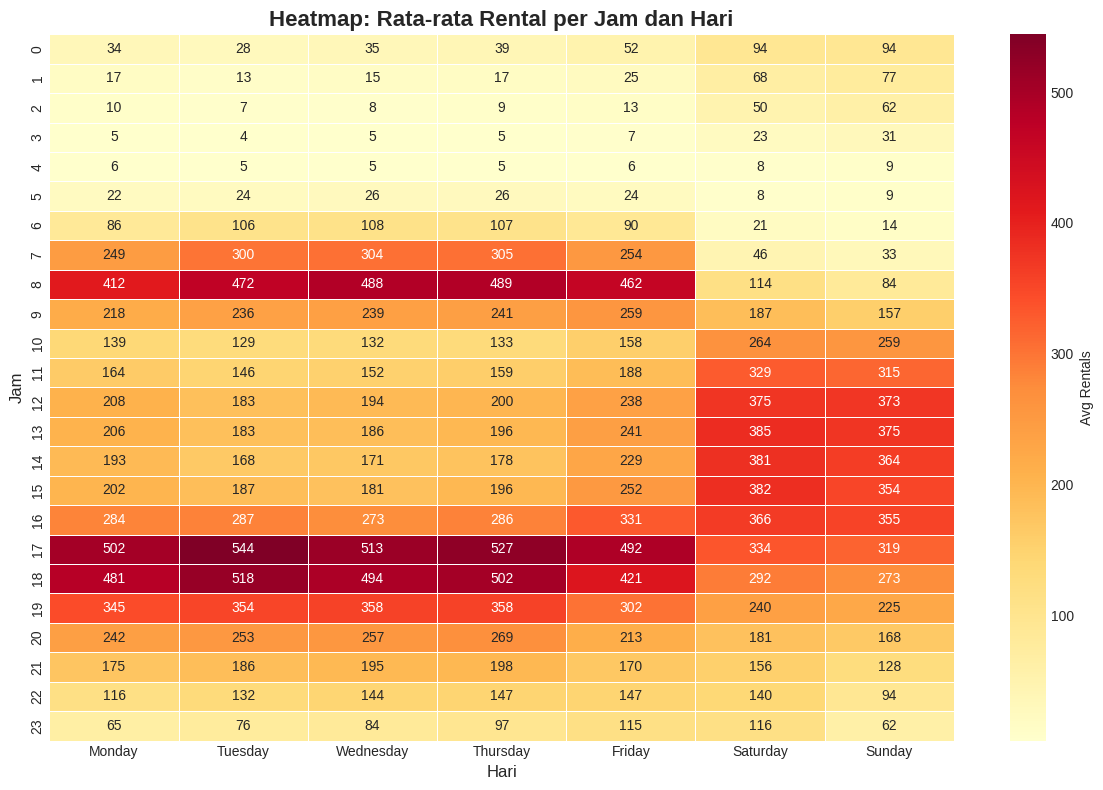

In [12]:
# Heatmap rental per jam dan hari
pivot_data = df.pivot_table(values='cnt', index='hr', columns='weekday_label', aggfunc='mean')
pivot_data = pivot_data[day_order]

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.0f', linewidths=0.5, cbar_kws={'label': 'Avg Rentals'})
plt.title('Heatmap: Rata-rata Rental per Jam dan Hari', fontsize=16, fontweight='bold')
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jam', fontsize=12)
plt.tight_layout()
plt.show()

### 4.3 Analisis Musiman (Seasonal Analysis)

Statistik Rental Berdasarkan Musim:
                 cnt                  casual registered
                mean      sum     std   mean       mean
season_label                                           
Fall          236.02  1061129  197.71  50.29     185.73
Spring        111.11   471348  119.22  14.29      96.82
Summer        208.34   918589  188.36  46.16     162.18
Winter        198.87   841613  182.97  30.67     168.20


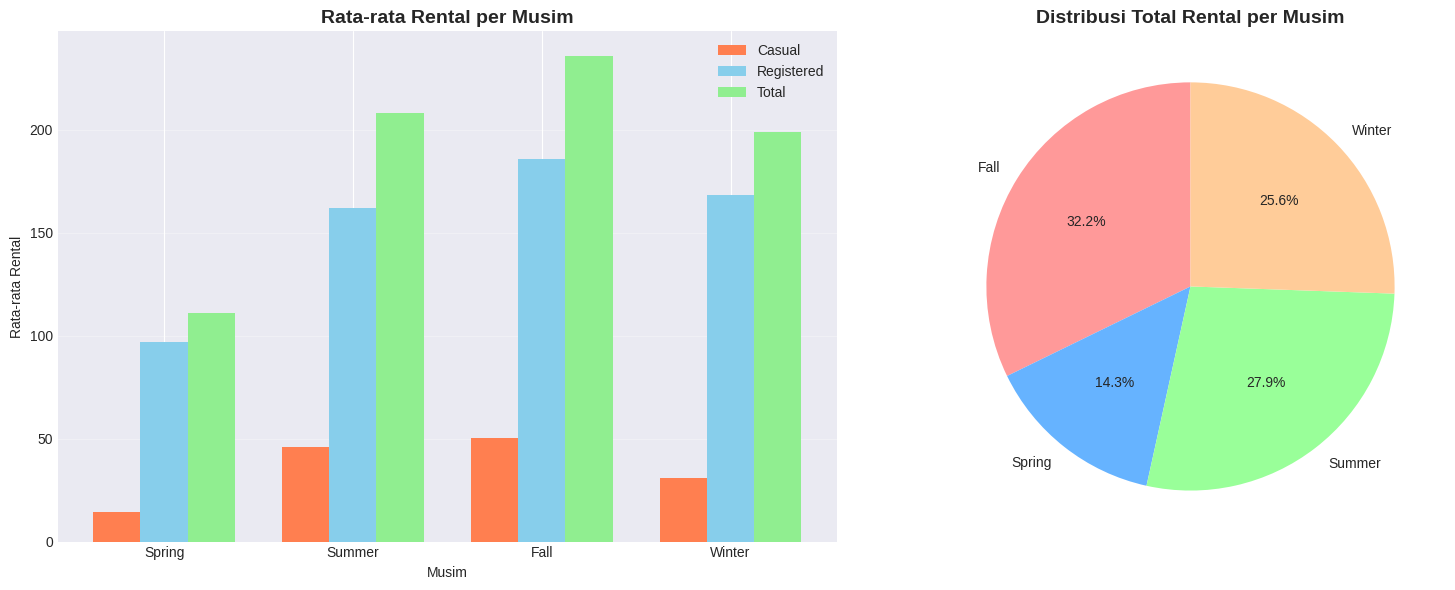

In [13]:
# Rental berdasarkan musim
seasonal_stats = df.groupby('season_label').agg({
    'cnt': ['mean', 'sum', 'std'],
    'casual': 'mean',
    'registered': 'mean'
}).round(2)

print("Statistik Rental Berdasarkan Musim:")
print(seasonal_stats)

# Visualisasi
season_data = df.groupby('season_label')[['casual', 'registered', 'cnt']].mean().reset_index()
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_data['season_label'] = pd.Categorical(season_data['season_label'], categories=season_order, ordered=True)
season_data = season_data.sort_values('season_label')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
x = np.arange(len(season_data))
width = 0.25
axes[0].bar(x - width, season_data['casual'], width, label='Casual', color='coral')
axes[0].bar(x, season_data['registered'], width, label='Registered', color='skyblue')
axes[0].bar(x + width, season_data['cnt'], width, label='Total', color='lightgreen')
axes[0].set_title('Rata-rata Rental per Musim', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Musim')
axes[0].set_ylabel('Rata-rata Rental')
axes[0].set_xticks(x)
axes[0].set_xticklabels(season_data['season_label'])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Pie chart untuk total rental
season_total = df.groupby('season_label')['cnt'].sum()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
axes[1].pie(season_total, labels=season_total.index, autopct='%1.1f%%',
           colors=colors, startangle=90)
axes[1].set_title('Distribusi Total Rental per Musim', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.4 Analisis Pengaruh Cuaca (Weather Impact Analysis)

Statistik Rental Berdasarkan Kondisi Cuaca:
                    cnt                 casual registered
                   mean      sum  count   mean       mean
weather_label                                            
Clear            204.87  2338173  11413  40.55     164.32
Heavy Rain/Snow   74.33      223      3   2.67      71.67
Light Snow/Rain  111.58   158331   1419  16.06      95.52
Mist             175.17   795952   4544  29.60     145.57


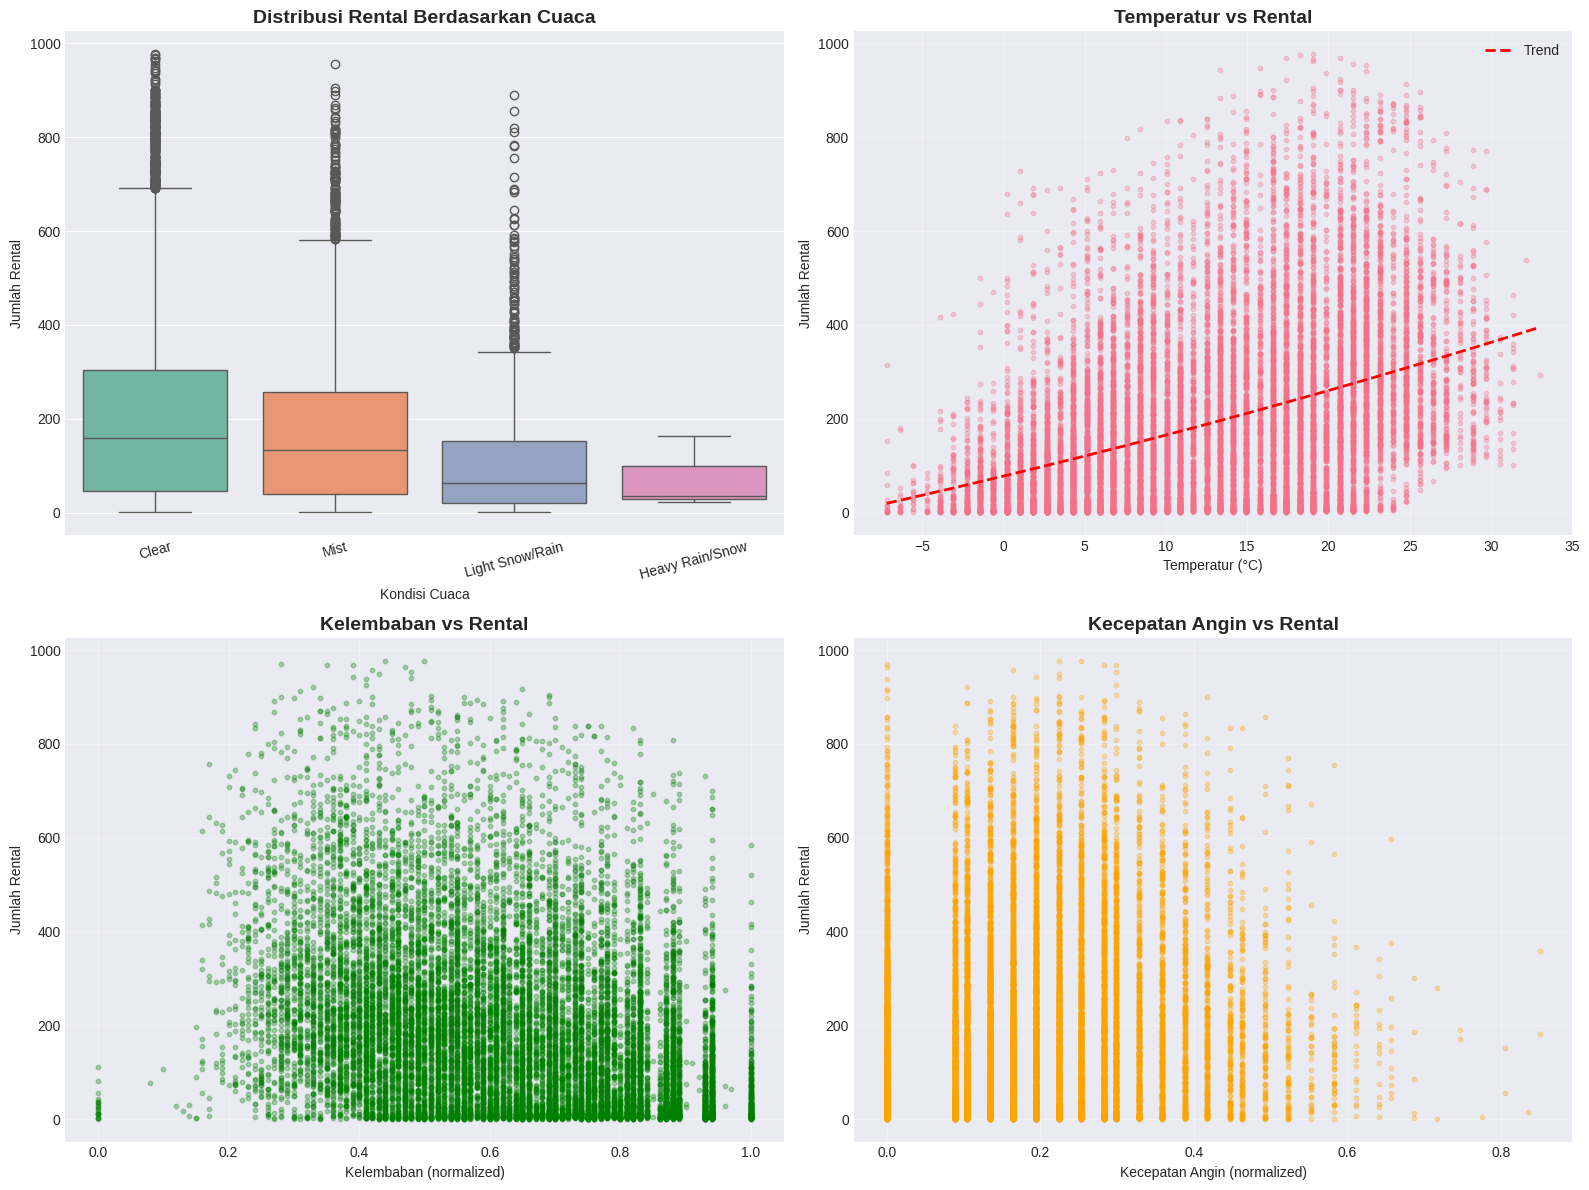

In [14]:
#Analisis situasi cuaca
weather_stats = df.groupby('weather_label').agg({
    'cnt': ['mean', 'sum', 'count'],
    'casual': 'mean',
    'registered': 'mean'
}).round(2)

print("Statistik Rental Berdasarkan Kondisi Cuaca:")
print(weather_stats)

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Box plot rental by weather
weather_order = ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow']
sns.boxplot(data=df, x='weather_label', y='cnt', order=weather_order, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Distribusi Rental Berdasarkan Cuaca', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Kondisi Cuaca')
axes[0, 0].set_ylabel('Jumlah Rental')
axes[0, 0].tick_params(axis='x', rotation=15)

# 2. Temperature vs rental
axes[0, 1].scatter(df['temp_celsius'], df['cnt'], alpha=0.3, s=10)
axes[0, 1].set_title('Temperatur vs Rental', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Temperatur (°C)')
axes[0, 1].set_ylabel('Jumlah Rental')

#Tambahkan garis tren
z = np.polyfit(df['temp_celsius'], df['cnt'], 2)
p = np.poly1d(z)
temp_range = np.linspace(df['temp_celsius'].min(), df['temp_celsius'].max(), 100)
axes[0, 1].plot(temp_range, p(temp_range), "r--", linewidth=2, label='Trend')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Humidity vs rental
axes[1, 0].scatter(df['hum'], df['cnt'], alpha=0.3, s=10, c='green')
axes[1, 0].set_title('Kelembaban vs Rental', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Kelembaban (normalized)')
axes[1, 0].set_ylabel('Jumlah Rental')
axes[1, 0].grid(True, alpha=0.3)

# 4. Windspeed vs rental
axes[1, 1].scatter(df['windspeed'], df['cnt'], alpha=0.3, s=10, c='orange')
axes[1, 1].set_title('Kecepatan Angin vs Rental', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Kecepatan Angin (normalized)')
axes[1, 1].set_ylabel('Jumlah Rental')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Analisis Korelasi

Menganalisis hubungan antar variabel untuk menemukan faktor-faktor yang paling berpengaruh.

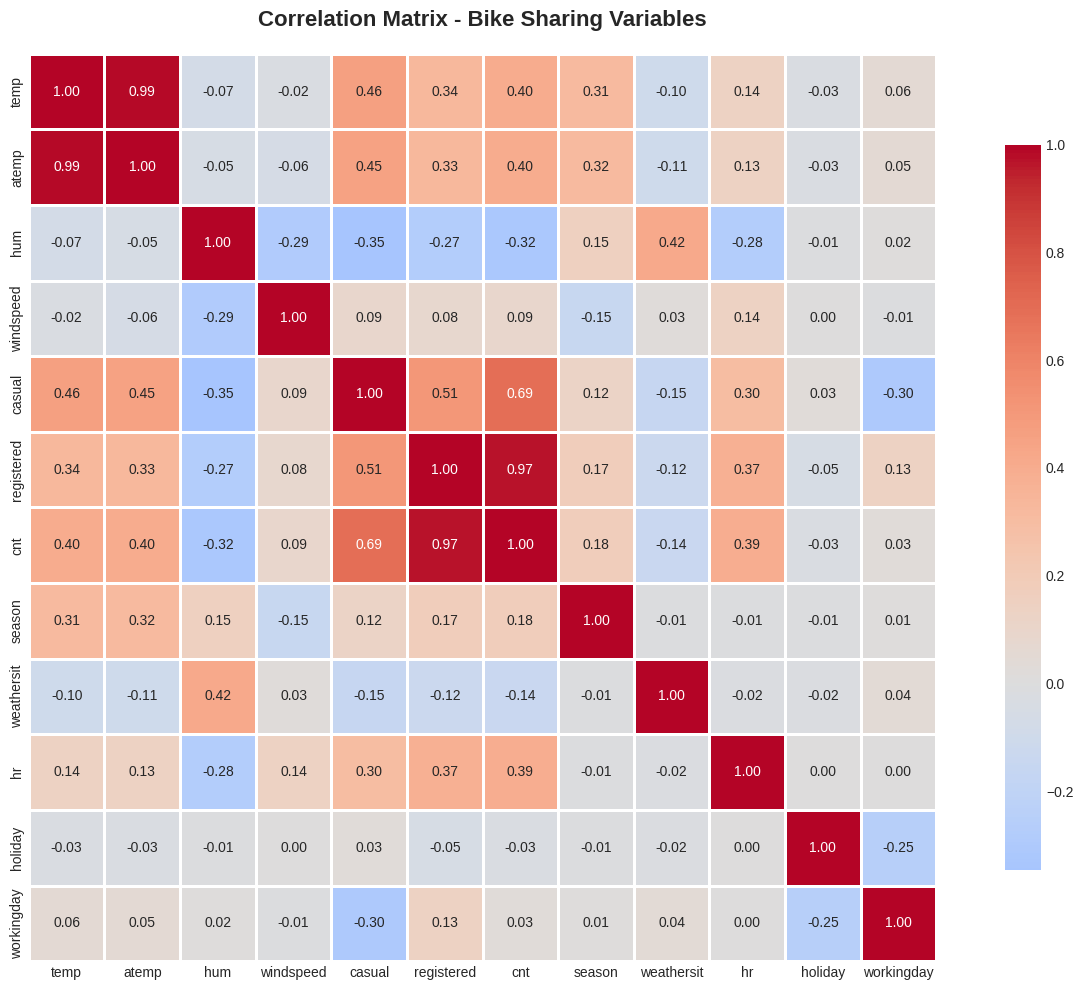


Top Korelasi dengan Total Rental (cnt):
cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
season        0.178056
windspeed     0.093234
workingday    0.030284
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


In [15]:
#Matriks korelasi
corr_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
                 'season', 'weathersit', 'hr', 'holiday', 'workingday']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Bike Sharing Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

#Korelasi teratas dengan cnt
cnt_corr = corr_matrix['cnt'].sort_values(ascending=False)
print("\nTop Korelasi dengan Total Rental (cnt):")
print(cnt_corr)

In [16]:
#Uji signifikansi statistik
print("Uji Signifikansi Korelasi dengan Total Rental:")
print("=" * 60)
for feature in ['temp', 'atemp', 'hum', 'windspeed', 'hr']:
    corr, p_value = pearsonr(df[feature], df['cnt'])
    significance = "Signifikan" if p_value < 0.05 else "Tidak Signifikan"
    print(f"{feature:12s}: r = {corr:6.3f}, p-value = {p_value:.4e} ({significance})")

Uji Signifikansi Korelasi dengan Total Rental:
temp        : r =  0.405, p-value = 0.0000e+00 (Signifikan)
atemp       : r =  0.401, p-value = 0.0000e+00 (Signifikan)
hum         : r = -0.323, p-value = 0.0000e+00 (Signifikan)
windspeed   : r =  0.093, p-value = 7.3457e-35 (Signifikan)
hr          : r =  0.394, p-value = 0.0000e+00 (Signifikan)


## 6. Time Series Analysis (Analisis Lanjutan)

Menganalisis trend, seasonality, dan pola temporal menggunakan decomposition.

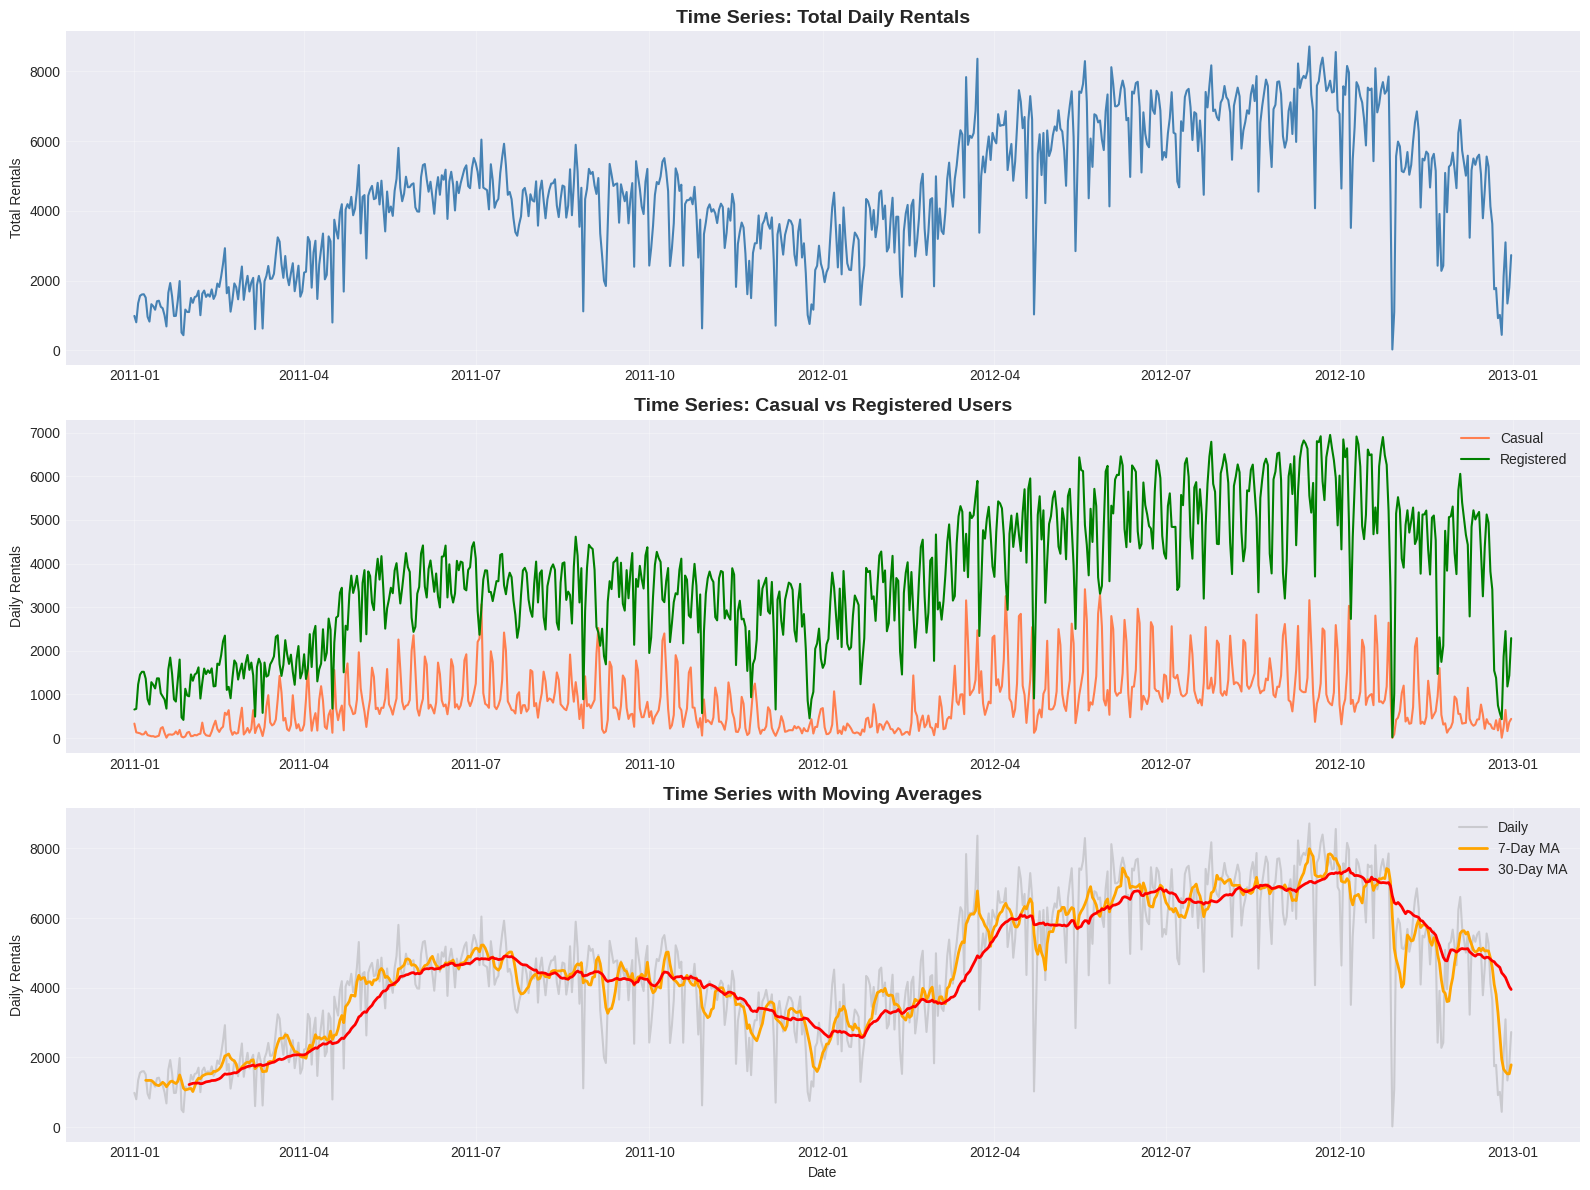

In [17]:
#Melakukan agregasi ke tingkat harian untuk analisis deret waktu yang lebih baik.
daily_data = df.groupby('dteday').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum',
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).reset_index()

daily_data.set_index('dteday', inplace=True)

# Time series plot
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Total rental over time
axes[0].plot(daily_data.index, daily_data['cnt'], linewidth=1.5, color='steelblue')
axes[0].set_title('Time Series: Total Daily Rentals', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Total Rentals')
axes[0].grid(True, alpha=0.3)

# Casual vs Registered
axes[1].plot(daily_data.index, daily_data['casual'], label='Casual', linewidth=1.5, color='coral')
axes[1].plot(daily_data.index, daily_data['registered'], label='Registered', linewidth=1.5, color='green')
axes[1].set_title('Time Series: Casual vs Registered Users', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Daily Rentals')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

#rata-rata pergerakan harian
daily_data['ma_7'] = daily_data['cnt'].rolling(window=7).mean()
daily_data['ma_30'] = daily_data['cnt'].rolling(window=30).mean()

axes[2].plot(daily_data.index, daily_data['cnt'], alpha=0.3, label='Daily', color='gray')
axes[2].plot(daily_data.index, daily_data['ma_7'], label='7-Day MA', linewidth=2, color='orange')
axes[2].plot(daily_data.index, daily_data['ma_30'], label='30-Day MA', linewidth=2, color='red')
axes[2].set_title('Time Series with Moving Averages', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Daily Rentals')
axes[2].set_xlabel('Date')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

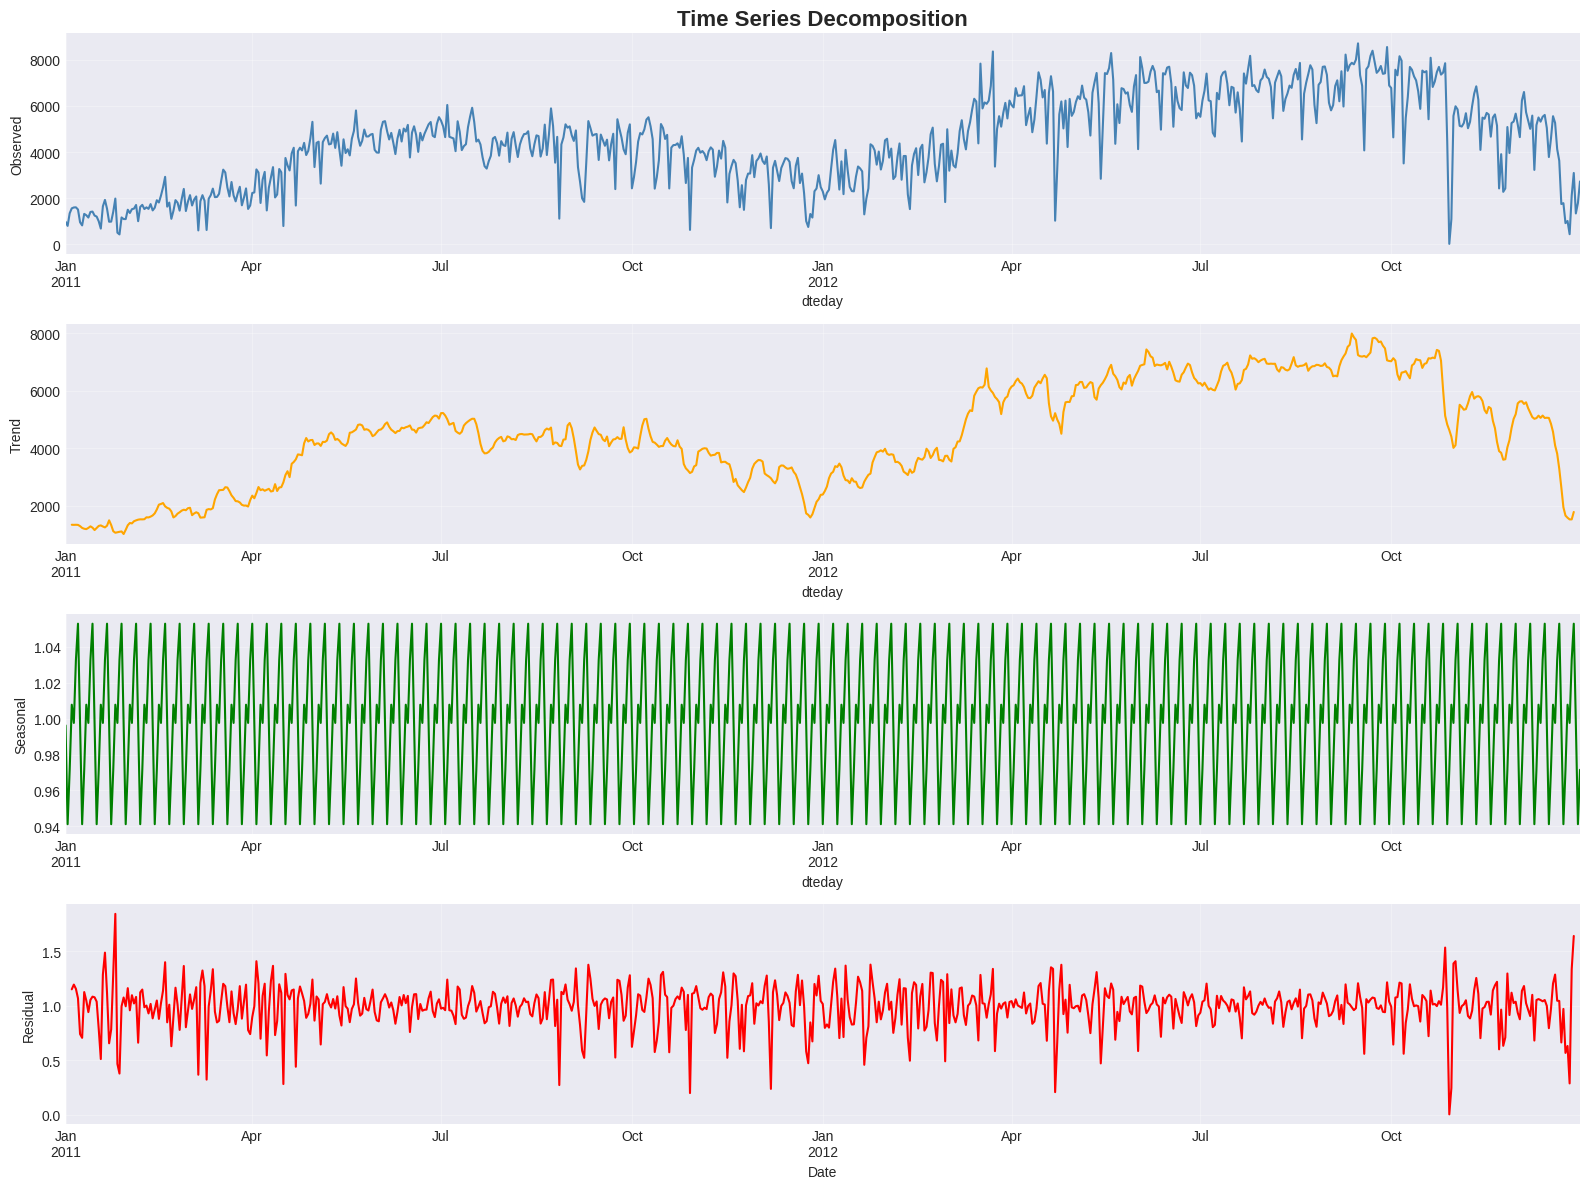

Insight dari Time Series Decomposition:
- Trend: Menunjukkan pertumbuhan jangka panjang rental sepeda
- Seasonal: Pola mingguan yang konsisten
- Residual: Fluktuasi acak setelah trend dan seasonality dihilangkan


In [18]:
# Dekomposisi musiman
# Menggunakan model perkalian
decomposition = seasonal_decompose(daily_data['cnt'], model='multiplicative', period=7)

fig, axes = plt.subplots(4, 1, figsize=(16, 12))

decomposition.observed.plot(ax=axes[0], color='steelblue')
axes[0].set_ylabel('Observed')
axes[0].set_title('Time Series Decomposition', fontsize=16, fontweight='bold')
axes[0].grid(True, alpha=0.3)

decomposition.trend.plot(ax=axes[1], color='orange')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

decomposition.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

decomposition.resid.plot(ax=axes[3], color='red')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight dari Time Series Decomposition:")
print("- Trend: Menunjukkan pertumbuhan jangka panjang rental sepeda")
print("- Seasonal: Pola mingguan yang konsisten")
print("- Residual: Fluktuasi acak setelah trend dan seasonality dihilangkan")

## 7. Clustering Analysis (K-Means)

Melakukan segmentasi pengguna berdasarkan pola penggunaan untuk menemukan grup-grup dengan karakteristik serupa.

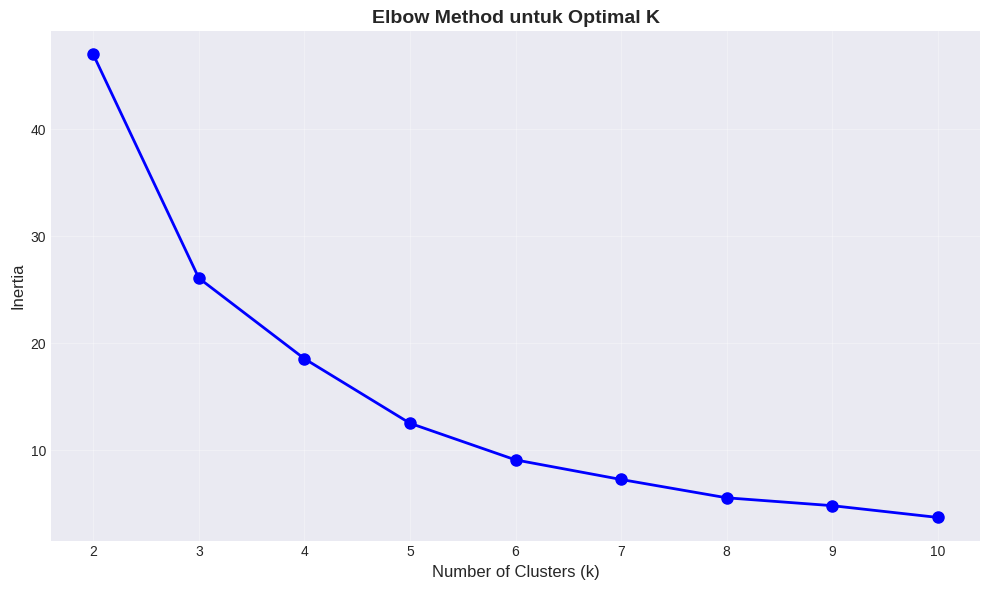

In [19]:
# Siapkan data untuk pengelompokan (clustering)
# Pola agregat per jam
cluster_features = df.groupby('hr').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean',
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).reset_index()

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features.drop('hr', axis=1))

# Elbow method untuk menemukan k optimal
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method untuk Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

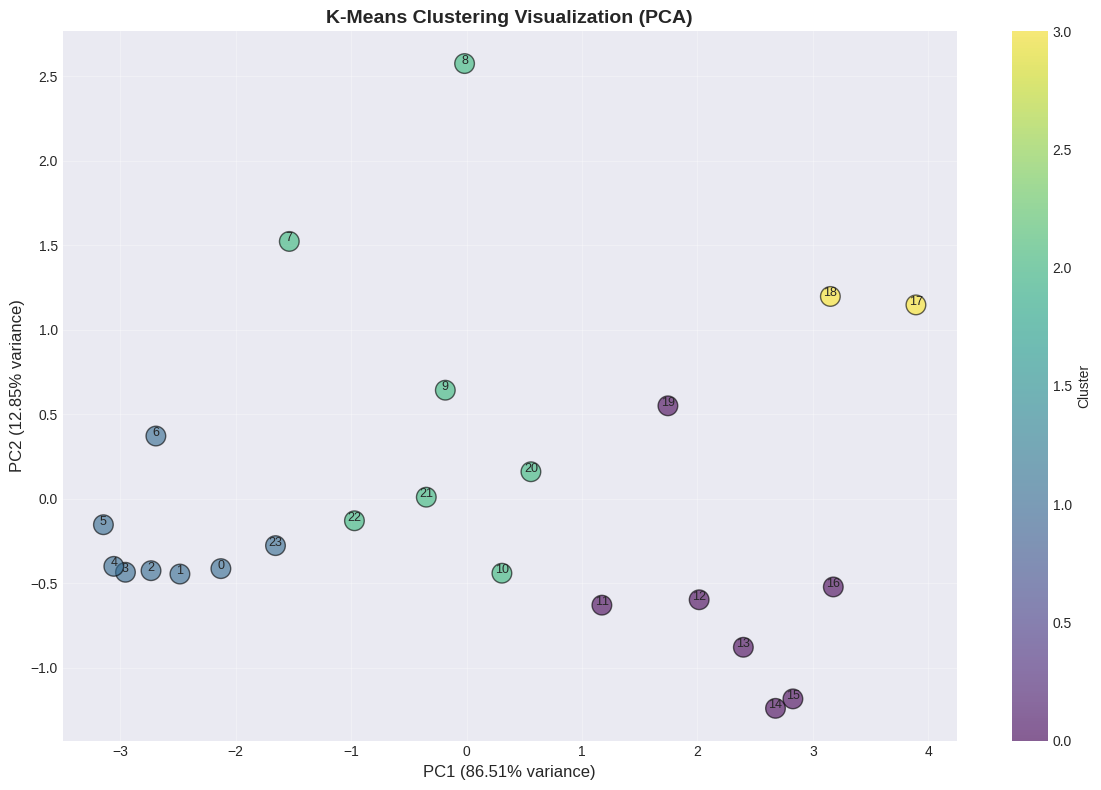


PCA Explained Variance: 99.36%


In [20]:
# Apply K-Means dengan k optimal
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_features['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi clusters menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_features['cluster'],
                     cmap='viridis', s=200, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('K-Means Clustering Visualization (PCA)', fontsize=14, fontweight='bold')

#Tambahkan label jam
for i, txt in enumerate(cluster_features['hr']):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=9, ha='center')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nPCA Explained Variance: {sum(pca.explained_variance_ratio_):.2%}")

In [21]:
# Analisis karakteristik cluster
print("\nKarakteristik Setiap Cluster:")
print("=" * 100)
cluster_summary = cluster_features.groupby('cluster').agg({
    'hr': lambda x: list(x),
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean',
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).round(2)

for cluster_id in range(optimal_k):
    print(f"\nCluster {cluster_id}:")
    print(f"  Jam: {cluster_summary.loc[cluster_id, 'hr']}")
    print(f"  Avg Total Rental: {cluster_summary.loc[cluster_id, 'cnt']:.2f}")
    print(f"  Avg Casual: {cluster_summary.loc[cluster_id, 'casual']:.2f}")
    print(f"  Avg Registered: {cluster_summary.loc[cluster_id, 'registered']:.2f}")
    print(f"  Avg Temperature: {cluster_summary.loc[cluster_id, 'temp']:.2f}")
    print(f"  Avg Humidity: {cluster_summary.loc[cluster_id, 'hum']:.2f}")
    print(f"  Avg Windspeed: {cluster_summary.loc[cluster_id, 'windspeed']:.2f}")


Karakteristik Setiap Cluster:

Cluster 0:
  Jam: [11, 12, 13, 14, 15, 16, 19]
  Avg Total Rental: 261.54
  Avg Casual: 67.59
  Avg Registered: 193.95
  Avg Temperature: 0.55
  Avg Humidity: 0.53
  Avg Windspeed: 0.22

Cluster 1:
  Jam: [0, 1, 2, 3, 4, 5, 6, 23]
  Avg Total Rental: 39.00
  Avg Casual: 5.77
  Avg Registered: 33.23
  Avg Temperature: 0.45
  Avg Humidity: 0.72
  Avg Windspeed: 0.16

Cluster 2:
  Jam: [7, 8, 9, 10, 20, 21, 22]
  Avg Total Rental: 213.39
  Avg Casual: 28.12
  Avg Registered: 185.27
  Avg Temperature: 0.48
  Avg Humidity: 0.66
  Avg Windspeed: 0.18

Cluster 3:
  Jam: [17, 18]
  Avg Total Rental: 443.48
  Avg Casual: 67.70
  Avg Registered: 375.78
  Avg Temperature: 0.55
  Avg Humidity: 0.52
  Avg Windspeed: 0.23


## 8. Pattern Mining & Business Insights

Mengekstrak insight bisnis dari pola-pola yang ditemukan.

Analisis Peak vs Off-Peak Hours:
                            cnt          casual registered
                           mean      sum   mean       mean
usage_period workingday                                   
Off-Peak     0           180.02   826453  57.68     122.33
             1           142.21  1404422  23.56     118.65
Peak         0           188.32   173816  56.24     132.08
             1           446.45   887988  35.50     410.95


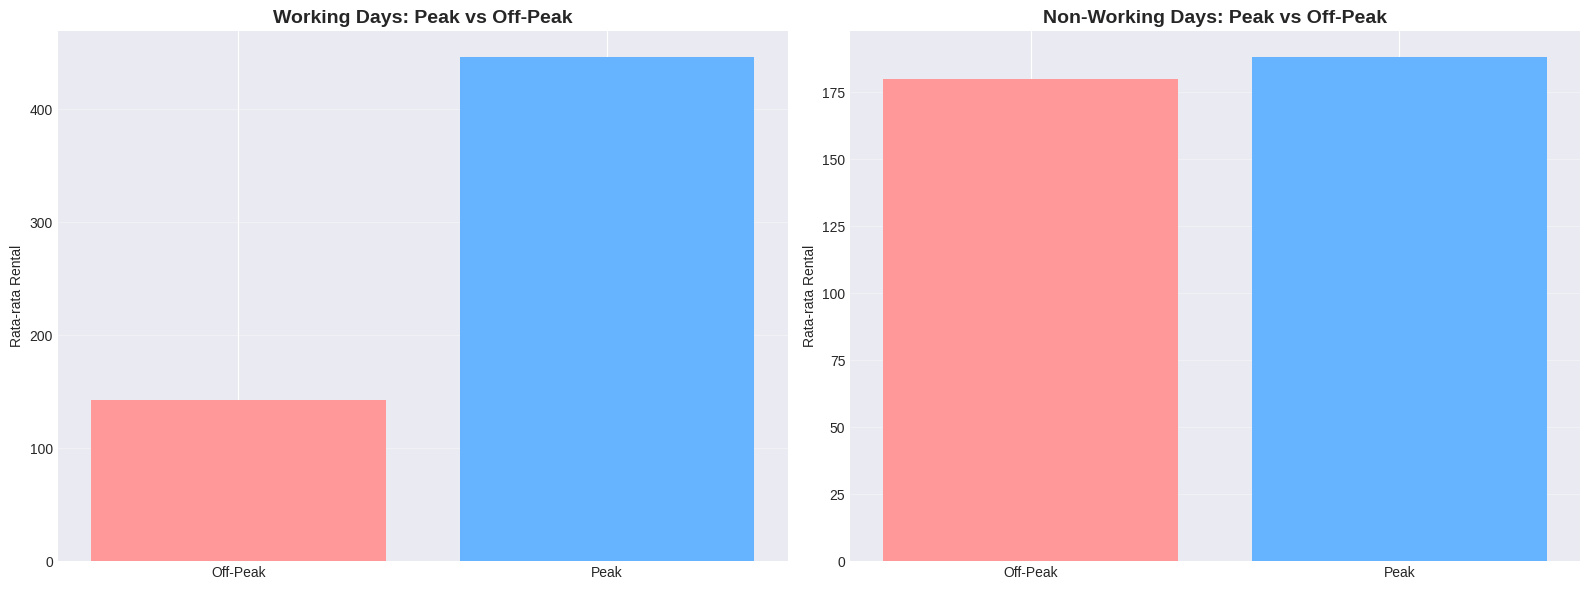

In [22]:
# Peak vs Off-peak analysis
df['usage_period'] = df['hr'].apply(lambda x: 'Peak' if x in [7, 8, 17, 18] else 'Off-Peak')

peak_analysis = df.groupby(['usage_period', 'workingday']).agg({
    'cnt': ['mean', 'sum'],
    'casual': 'mean',
    'registered': 'mean'
}).round(2)

print("Analisis Peak vs Off-Peak Hours:")
print(peak_analysis)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Perbandingan hari kerja
working_peak = df[df['workingday'] == 1].groupby('usage_period')['cnt'].mean()
axes[0].bar(working_peak.index, working_peak.values, color=['#ff9999', '#66b3ff'])
axes[0].set_title('Working Days: Peak vs Off-Peak', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Rata-rata Rental')
axes[0].grid(axis='y', alpha=0.3)

#Perbandingan hari libur
nonworking_peak = df[df['workingday'] == 0].groupby('usage_period')['cnt'].mean()
axes[1].bar(nonworking_peak.index, nonworking_peak.values, color=['#ff9999', '#66b3ff'])
axes[1].set_title('Non-Working Days: Peak vs Off-Peak', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Rata-rata Rental')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Year-over-Year Growth Analysis:
year     2011    2012  growth_rate
month                             
1       38189   96744       153.33
2       48215  103137       113.91
3       64045  164875       157.44
4       94870  174224        83.64
5      135821  195865        44.21
6      143512  202830        41.33
7      141341  203607        44.05
8      136691  214503        56.93
9      127418  218573        71.54
10     123511  198841        60.99
11     102167  152664        49.43
12      87323  123713        41.67


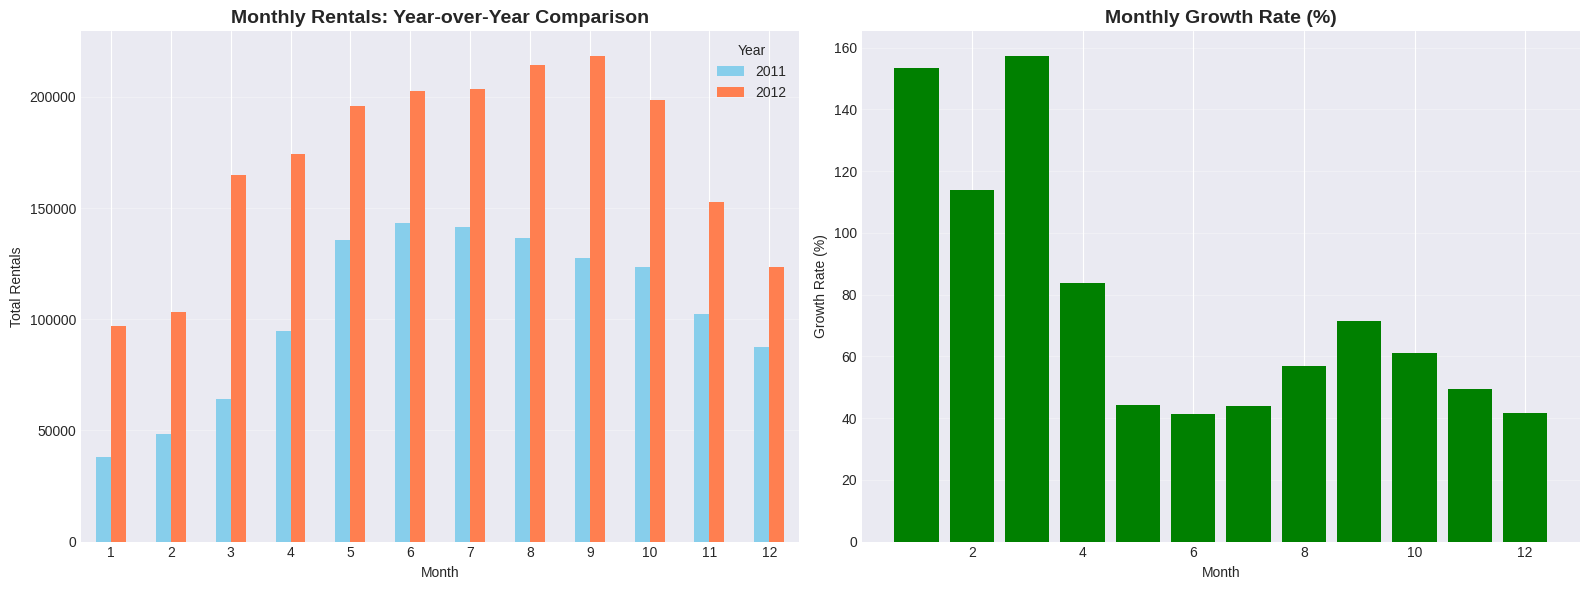

In [23]:
# Analisis pertumbuhan tahun ke tahun
yoy_growth = df.groupby(['year', 'month'])['cnt'].sum().reset_index()
yoy_pivot = yoy_growth.pivot(index='month', columns='year', values='cnt')

#Hitung tingkat pertumbuhan
if len(yoy_pivot.columns) == 2:
    yoy_pivot['growth_rate'] = ((yoy_pivot.iloc[:, 1] - yoy_pivot.iloc[:, 0]) / yoy_pivot.iloc[:, 0] * 100).round(2)

print("\nYear-over-Year Growth Analysis:")
print(yoy_pivot)

# Visualisasi
if len(yoy_pivot.columns) >= 2:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Perbandingan bulanan
    yoy_pivot.iloc[:, :2].plot(kind='bar', ax=axes[0], color=['skyblue', 'coral'])
    axes[0].set_title('Monthly Rentals: Year-over-Year Comparison', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel('Total Rentals')
    axes[0].legend(title='Year')
    axes[0].grid(axis='y', alpha=0.3)
    axes[0].tick_params(axis='x', rotation=0)

    # Tingkat pertumbuhan
    if 'growth_rate' in yoy_pivot.columns:
        axes[1].bar(yoy_pivot.index, yoy_pivot['growth_rate'],
                   color=['green' if x > 0 else 'red' for x in yoy_pivot['growth_rate']])
        axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        axes[1].set_title('Monthly Growth Rate (%)', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Month')
        axes[1].set_ylabel('Growth Rate (%)')
        axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

## 9. Key Business Insights & Recommendations

Rangkuman insight strategis untuk bisnis bike sharing.

In [24]:
# Kalkulasi key metrics
total_rentals = df['cnt'].sum()
avg_daily_rentals = daily_data['cnt'].mean()
peak_hour = df.groupby('hr')['cnt'].mean().idxmax()
peak_hour_avg = df.groupby('hr')['cnt'].mean().max()
best_season = df.groupby('season_label')['cnt'].mean().idxmax()
best_weather = df.groupby('weather_label')['cnt'].mean().idxmax()
casual_pct = (df['casual'].sum() / total_rentals * 100)
registered_pct = (df['registered'].sum() / total_rentals * 100)

# Temperature sweet spot
temp_bins = pd.cut(df['temp_celsius'], bins=10)
temp_rentals = df.groupby(temp_bins)['cnt'].mean().sort_values(ascending=False)
optimal_temp = temp_rentals.index[0]

print("="*100)
print(" " * 35 + "KEY BUSINESS INSIGHTS")
print("="*100)
print(f"\n1. VOLUME METRICS:")
print(f"   • Total Rentals: {total_rentals:,}")
print(f"   • Average Daily Rentals: {avg_daily_rentals:,.0f}")
print(f"   • Peak Hour: {peak_hour}:00 with avg {peak_hour_avg:.0f} rentals")

print(f"\n2. USER SEGMENTATION:")
print(f"   • Registered Users: {registered_pct:.1f}% of total rentals")
print(f"   • Casual Users: {casual_pct:.1f}% of total rentals")
print(f"   • Strategy: Focus on converting casual to registered users")

print(f"\n3. TEMPORAL PATTERNS:")
print(f"   • Best Season: {best_season}")
print(f"   • Peak Hours: 7-9 AM and 5-7 PM (commuting hours)")
print(f"   • Weekend vs Weekday: Different usage patterns detected")

print(f"\n4. WEATHER IMPACT:")
print(f"   • Best Weather: {best_weather}")
print(f"   • Optimal Temperature: {optimal_temp}")
print(f"   • High correlation: Temperature (0.4+), Clear weather preferred")

print(f"\n5. STRATEGIC RECOMMENDATIONS:")
print(f"   ✓ Increase bike availability during peak hours (7-9 AM, 5-7 PM)")
print(f"   ✓ Implement dynamic pricing based on demand patterns")
print(f"   ✓ Focus marketing on Fall season (highest usage)")
print(f"   ✓ Develop weather-based promotions")
print(f"   ✓ Create loyalty programs to convert casual to registered users")
print(f"   ✓ Optimize bike redistribution using clustering insights")
print("\n" + "="*100)

                                   KEY BUSINESS INSIGHTS

1. VOLUME METRICS:
   • Total Rentals: 3,292,679
   • Average Daily Rentals: 4,504
   • Peak Hour: 17:00 with avg 461 rentals

2. USER SEGMENTATION:
   • Registered Users: 81.2% of total rentals
   • Casual Users: 18.8% of total rentals
   • Strategy: Focus on converting casual to registered users

3. TEMPORAL PATTERNS:
   • Best Season: Fall
   • Peak Hours: 7-9 AM and 5-7 PM (commuting hours)
   • Weekend vs Weekday: Different usage patterns detected

4. WEATHER IMPACT:
   • Best Weather: Clear
   • Optimal Temperature: (24.964, 28.982]
   • High correlation: Temperature (0.4+), Clear weather preferred

5. STRATEGIC RECOMMENDATIONS:
   ✓ Increase bike availability during peak hours (7-9 AM, 5-7 PM)
   ✓ Implement dynamic pricing based on demand patterns
   ✓ Focus marketing on Fall season (highest usage)
   ✓ Develop weather-based promotions
   ✓ Create loyalty programs to convert casual to registered users
   ✓ Optimize bike 

## 10. Export Data untuk Dashboard

Menyimpan data yang sudah diproses untuk digunakan di dashboard Streamlit.

In [25]:
# Simpan data yang diproses
df.to_csv('processed_hour.csv', index=False)
daily_data.to_csv('processed_daily.csv')
cluster_features.to_csv('cluster_analysis.csv', index=False)

print("Data berhasil disimpan untuk dashboard:")
print("✓ processed_hour.csv")
print("✓ processed_daily.csv")
print("✓ cluster_analysis.csv")

Data berhasil disimpan untuk dashboard:
✓ processed_hour.csv
✓ processed_daily.csv
✓ cluster_analysis.csv


## 📝 Conclusion

Analisis ini telah berhasil mengungkap berbagai insight penting:

### Temuan Utama:
1. **Pola Temporal**: Terdapat pola yang jelas dengan peak hours di pagi (7-9) dan sore (17-19)
2. **Segmentasi Pengguna**: Registered users mendominasi dengan pola commuting yang konsisten
3. **Pengaruh Cuaca**: Temperatur dan kondisi cuaca memiliki pengaruh signifikan terhadap rental
4. **Clustering**: Berhasil mengidentifikasi 4 cluster waktu dengan karakteristik berbeda
5. **Pertumbuhan**: Tren positif year-over-year menunjukkan adopsi yang meningkat

### Teknik Analisis Lanjutan yang Digunakan:
- ✅ Time Series Decomposition
- ✅ K-Means Clustering
- ✅ Principal Component Analysis (PCA)
- ✅ Correlation Analysis dengan Statistical Testing
- ✅ Pattern Mining

---
**Tools**: Python, Pandas, Scikit-learn, Statsmodels, Matplotlib, Seaborn